In [120]:
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist
import matplotlib.pyplot as plt

In [121]:
## Shape of datsets - 55000 (image) , 28 X 28 ( each image is 28 X 28)
trainX, trainY, testX, testY = mnist.load_data(one_hot = True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


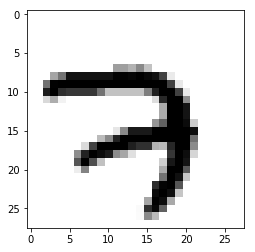

In [122]:
def display_pic(index):
    image = trainX[index].reshape([28,28])
    plt.imshow(image, cmap='gray_r')
    plt.show()

display_pic(0)

In [123]:
testX.shape

(10000, 784)

In [124]:
def build_model(no_of_nodes):
    tf.reset_default_graph()
    
    #Inputs
    net = tflearn.input_data([None, trainX.shape[1]])
    
    #Hidden layers
    for i in no_of_nodes:
        net = tflearn.fully_connected(net, i, activation='ReLU')
        #net = tflearn.fully_connected(net, no_of_nodes[i], activation='ReLU')
    
    #Output Layer & training model
    #activation for output layer is softmax
    #
    net = tflearn.fully_connected(net,10, activation='softmax')
    net = tflearn.regression(net, optimizer='sgd', learning_rate=0.01, loss='categorical_crossentropy')
    
    model = tflearn.DNN(net)
    return model


In [125]:
layers_to_nodes_mapping = [[32,16],[16,8,32], [8,16,32,64],[4,8,16,32,64,128], [128,64,32,16,8],[128,64,32,16],[128,64,32],[32,16,8]]
print(layers_to_nodes_mapping)

[[32, 16], [16, 8, 32], [8, 16, 32, 64], [4, 8, 16, 32, 64, 128], [128, 64, 32, 16, 8], [128, 64, 32, 16], [128, 64, 32], [32, 16, 8]]


In [ ]:
output = []
for lt in layers_to_nodes_mapping:
    model = build_model(lt)
    model.fit(trainX,trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=100)
    pred = np.argmax(model.predict(testX), axis=1)
    actu = np.argmax(testY, axis=1)
    print(sum(pred == actu))
    output.append([lt,sum(pred==actu)])


Training Step: 3638  | total loss: 2.30157 | time: 1.522s
| SGD | epoch: 008 | loss: 2.30157 - acc: 0.1133 -- iter: 17300/49500


[[[32, 16], 9597], [[16, 8, 32], 8626], [[8, 16, 32, 64], 1135], [[4, 8, 16, 32, 64, 128], 1135], [[128, 64, 32, 16, 8], 1135], [[128, 64, 32, 16], 1135], [[128, 64, 32], 9585], [[32, 16, 8], 8334]]
32_16  --> 9597
16_8_32  --> 8626
8_16_32_64  --> 1135
4_8_16_32_64_128  --> 1135
128_64_32_16_8  --> 1135
128_64_32_16  --> 1135
128_64_32  --> 9585
32_16_8  --> 8334


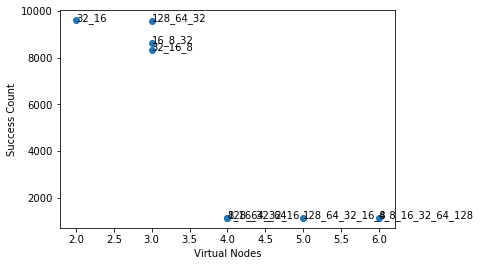

In [118]:
plt.figure(figsize=(10, 6), dpi=80)
print(output)
no_of_nodes = [len(i[0]) for i in output]
no_of_success = [i[1] for i in output]
point_text = [ "_".join(str(x) for x in i[0]) for i in output]


fig, ax = plt.subplots()
ax.scatter(no_of_nodes, no_of_success)

for i, txt in enumerate(point_text):
    print(txt," -->", no_of_success[i])
    ax.annotate(txt, (no_of_nodes[i],no_of_success[i]))



plt.ylabel("Success Count")
plt.xlabel("Virtual Nodes")
    
plt.savefig('AI with nodes')
plt.show()